# Task2

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib import cm
from tqdm import tqdm
from numpy import linalg as LA

import urllib
from urllib.error import HTTPError
from deap import tools

%matplotlib inline


In [29]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified


def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified


def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified


def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])


# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)


# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)


# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)


In [30]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(),
                                        Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()


def plot_mutation(
    objective_function,
    mutations,
    original_individual,
    title,
    domain_X=np.arange(-5, 5, 0.25),
    domain_Y=np.arange(-5, 5, 0.25),
):

    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(),
                                        Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    plt.figure(figsize=(12, 8))
    plt.contour(X, Y, Z, 50)
    plt.scatter(mutations[:, 0], mutations[:, 1], edgecolor='black')
    plt.plot(original_individual[0, 0], original_individual[0,
                                                            1], 'k*', markersize=24, color='red')
    plt.title(title)
    plt.show()


# Mutation 1
## $x_i$ = $x_i$ + $\varepsilon_i$ ,  $\varepsilon_i$ ~ $\mathcal{N}(0, \sigma^2)$ , $\sigma$ fixed for all $i = 1, 2, \ldots, d$

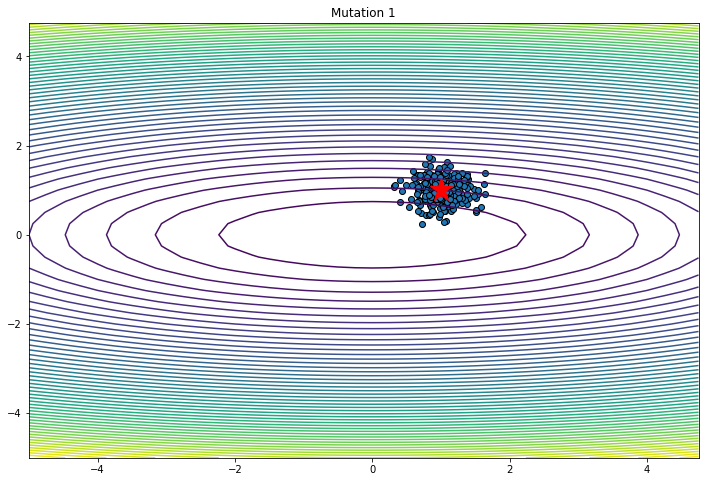

In [31]:
N = 250
d = 2
sigma = 0.25


def mutation1(x, sigma):
    return x + sigma * np.random.randn(N, d)


original_individual = np.array([[1, 1]])
mutations1 = mutation1(original_individual, sigma)

plot_mutation(
    objective_function=objective_function_F1a,
    mutations=mutations1,
    original_individual=original_individual,
    title='Mutation 1',
    domain_X=np.arange(-5, 5, 0.25),
    domain_Y=np.arange(-5, 5, 0.25),
)


# Mutation 2
## $x_i$ = $x_i$ + $\varepsilon_i$ ,  $\varepsilon_i$ ~ $\mathcal{N}(0, \sigma^2)$ , $\sigma$ can be different for all $i = 1, 2, \ldots, d$

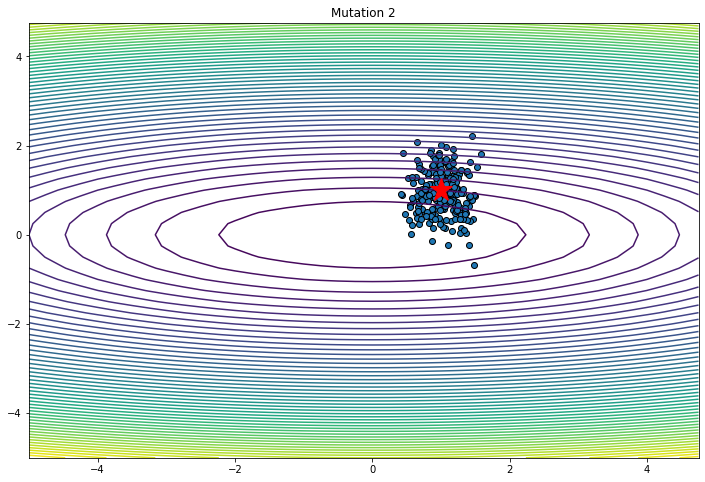

In [32]:
sigma = np.array([0.25, 0.5])


def mutation2(x, sigma):
    return x + sigma * np.random.randn(N, d)

original_individual = np.array([[1, 1]])
mutations2 = mutation2(original_individual, sigma)


plot_mutation(
    objective_function=objective_function_F1a,
    mutations=mutations2,
    original_individual=original_individual,
    title='Mutation 2',
    domain_X=np.arange(-5, 5, 0.25),
    domain_Y=np.arange(-5, 5, 0.25),
)


# Mutation 3
## $x$ = $x$ + $\varepsilon$ , gdzie $\varepsilon$ ma wielowymiarowy rozkład normalny $\mathcal{N}(0, \Sigma^2)$

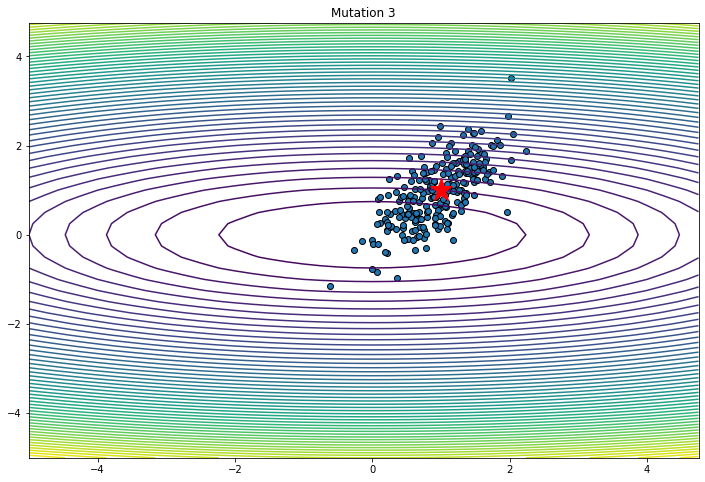

In [33]:
def mutation3(x, sigma):
    return x + np.dot(np.random.randn(N, d), np.linalg.cholesky(sigma).T)

original_individual = np.array([[1, 1]])
S = np.array([[0.25, 0.25], [0.25, 0.5]])
mutations3 = mutation3(original_individual, S)
            
plot_mutation(
    objective_function=objective_function_F1a,
    mutations=mutations3,
    original_individual=original_individual,
    title='Mutation 3',
    domain_X=np.arange(-5, 5, 0.25),
    domain_Y=np.arange(-5, 5, 0.25),
)


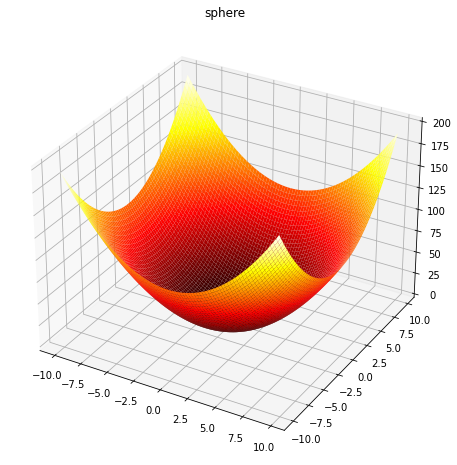

Mutation 1
Better individuals after mutation 142 / 250, best score: -0.4855949435867827

Better individuals after mutation 127 / 250, best score: -0.47559401410716595

Better individuals after mutation 129 / 250, best score: -0.5780516871661977

Mutation 2
Better individuals after mutation 147 / 250, best score: -0.27304594639829227

Better individuals after mutation 133 / 250, best score: -0.3877239062645853

Better individuals after mutation 126 / 250, best score: -0.2950639419343799

Mutation 3
Better individuals after mutation 133 / 250, best score: -0.0024222254140606396

Better individuals after mutation 137 / 250, best score: -0.0036192186963516187

Better individuals after mutation 119 / 250, best score: -0.0004886104515733557



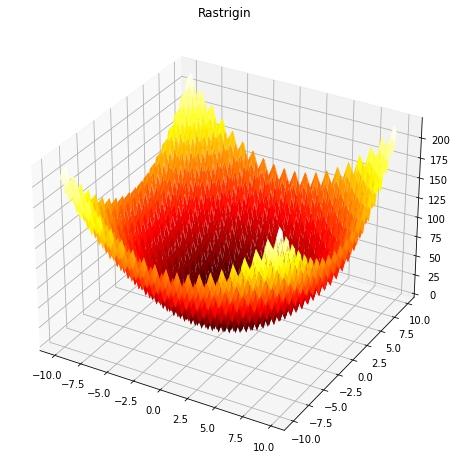

Mutation 1
Better individuals after mutation 249 / 250, best score: -1.9939139441530287

Better individuals after mutation 250 / 250, best score: -2.106205598059443

Better individuals after mutation 250 / 250, best score: -2.0877188489661727

Mutation 2
Better individuals after mutation 250 / 250, best score: -2.093089750544756

Better individuals after mutation 250 / 250, best score: -2.2078569084526656

Better individuals after mutation 249 / 250, best score: -1.7008302872123302

Mutation 3
Better individuals after mutation 250 / 250, best score: -2.7183359666004527

Better individuals after mutation 250 / 250, best score: -2.1802435685208295

Better individuals after mutation 249 / 250, best score: -1.900572320786594



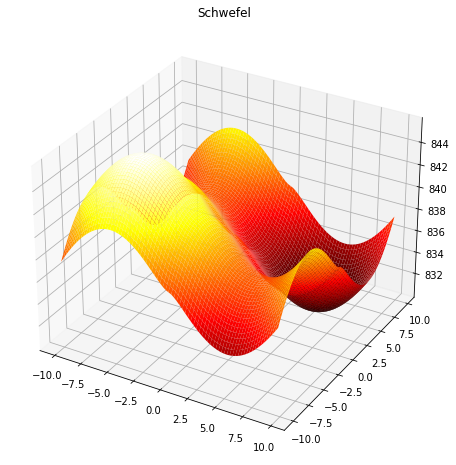

Mutation 1
Better individuals after mutation 122 / 250, best score: -835.2835513402414

Better individuals after mutation 119 / 250, best score: -835.1261240091869

Better individuals after mutation 121 / 250, best score: -835.2113477054281

Mutation 2
Better individuals after mutation 129 / 250, best score: -834.434165093303

Better individuals after mutation 133 / 250, best score: -834.4913950078716

Better individuals after mutation 126 / 250, best score: -834.7254355283058

Mutation 3
Better individuals after mutation 131 / 250, best score: -832.0375257666564

Better individuals after mutation 116 / 250, best score: -833.4243824913372

Better individuals after mutation 125 / 250, best score: -832.7300377594768



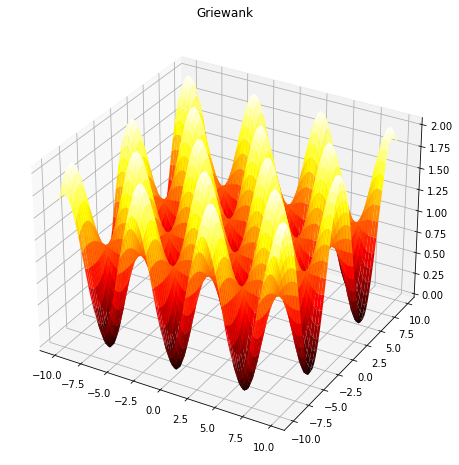

Mutation 1
Better individuals after mutation 135 / 250, best score: -0.1242724878467113

Better individuals after mutation 136 / 250, best score: -0.15987502792302988

Better individuals after mutation 131 / 250, best score: -0.132419351041015

Mutation 2
Better individuals after mutation 143 / 250, best score: -0.05048691781657877

Better individuals after mutation 144 / 250, best score: -0.03467148267691578

Better individuals after mutation 151 / 250, best score: -0.14693836441933084

Mutation 3
Better individuals after mutation 135 / 250, best score: -0.0034956854158290085

Better individuals after mutation 137 / 250, best score: -0.0004449421320056324

Better individuals after mutation 129 / 250, best score: -0.00834516974024091



In [34]:
mutations = {'mutation1': (mutation1, 0.25), 'mutation2': (
    mutation2, np.array([0.25, 0.5])), 'mutation3': (mutation3, np.array([[0.25, 0.25], [0.25, 0.5]]))}

functions = {'sphere': objective_function_F1, 'Rastrigin': objective_function_F6,
             'Schwefel': objective_function_F7, 'Griewank': objective_function_F8}


def test_mutation(
    mutation,
    objective_function,
    original_individual,
):
    scores = objective_function(mutation)
    original_individual_score = objective_function(original_individual)

    better_indi = np.sum(scores < original_individual_score)
    best_indi = scores.max()
    worst_indi = scores.min()
    mean_indi = scores.mean()
    print(
        f'Better individuals after mutation {better_indi} / {mutation.shape[0]}, best score: {best_indi}')
    print()

for i, (name, objective_function) in enumerate(functions.items()):
    plot_3D_benchmark_function(
        objective_function = objective_function,
        domain_X = np.arange(-10, 10, 0.25), 
        domain_Y = np.arange(-10, 10, 0.25),
        title = f'{name}'
    )
    for j, (name, (mutation_f, sigma)) in enumerate(mutations.items()):
        print(f'Mutation {j + 1}')
        for k in range(3):
            original_individual = np.array([[1, 1]])
            mutation = mutation_f(original_individual, sigma)
            test_mutation(
                mutation=mutation,
                objective_function = objective_function,
                original_individual = original_individual
            )
        


7.712896402716184e-21


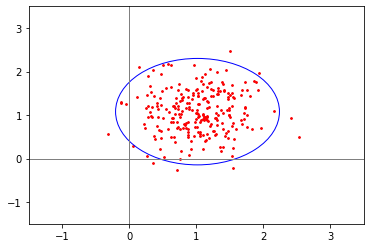

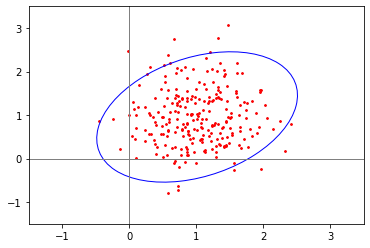

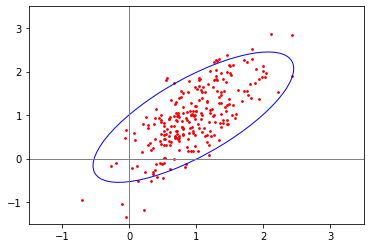

In [35]:
# TO DO: ELIPSES
from scipy.stats import chi2
print(chi2.cdf(95, 250))
mutations = {'mutation1': (mutation3, np.array([[0.25, 0.0], [0.0, 0.25]])), 'mutation2': (mutation3, np.array(
    [[0.25, 0.00], [0.00, 0.5]])), 'mutation3': (mutation3, np.array([[0.25, 0.25], [0.25, 0.5]]))}

original_individual = np.array([[1, 1]])
for k, v in mutations.items():
    mutation, sigma = v
    a = sigma[0][0]
    b = sigma[0][1]
    c = sigma[1][1]
    mutations = mutation(original_individual, sigma)
    fig, ax = plt.subplots()
    x, y = mutations[:, 0], mutations[:, 1]
    ax.scatter(x, y, s=0.5)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    axis1 = (a+c)/2 + np.sqrt(((a-c)/2)**2 + b**2)
    axis2 = (a+c)/2 - np.sqrt(((a-c)/2)**2 + b**2)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    ellipse = Ellipse((0, 0), edgecolor='b', facecolor='none', width=np.sqrt(
        5.991*axis1) * 2, height=np.sqrt(5.991*axis2) * 2)
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    ax.scatter(x, y, c='red', s=3)
    plt.xlim(-1.5, 3.5)
    plt.ylim(-1.5, 3.5)
    plt.show()


# Task 3

In [36]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1, low=-500, high=500, mutation=0):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = -10000000000000

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * \
        np.random.rand(population_size, chromosome_length) + 5
    current_population_sigmas = sigma * \
        np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(
        current_population_solutions)

    for t in range(number_of_iterations):
        current_population_solutions[current_population_solutions < low] = low
        current_population_solutions[current_population_solutions > high] = high
        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - \
            current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)

        parent_indices = np.random.choice(
            population_size,
            (number_of_offspring, number_of_parents),
            True,
            fitness_values
        ).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros(
            (number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros(
            (number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(
                axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(
                axis=0)

        if mutation== 0:
            # mutating the children population by adding random gaussian noise
            children_population_sigmas = children_population_sigmas \
                * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length)
                         + tau_0 * np.random.randn(number_of_offspring, 1))

            children_population_solutions += children_population_sigmas * \
                np.random.randn(number_of_offspring, chromosome_length)

        if mutation == 1:
            sig = 0.25
            children_population_solutions = np.array(
                [c + sig * np.random.randn(1, chromosome_length) for c in children_population_solutions])[0]

        if mutation == 2:
            sig = np.array([0.25, 0.5])
            children_population_solutions = np.array(
                [c + sigma * np.random.randn(1, chromosome_length) for c in children_population_solutions])[0]
        if mutation == 3:
            Sig = np.array([[0.25, 0.25], [0.25, 0.5]])
            children_population_solutions = np.array([c + np.dot(np.random.randn(
                1, chromosome_length), np.linalg.cholesky(Sig).T) for c in children_population_solutions])[0]


        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(
            children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([
            current_population_objective_values,
            children_population_objective_values
        ])

        current_population_solutions = np.vstack(
            [current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack(
            [current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[
            I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [
            current_population_objective_values.min(),
            current_population_objective_values.max(),
            current_population_objective_values.mean(),
            current_population_objective_values.std()
        ]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t+1, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (
                t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas


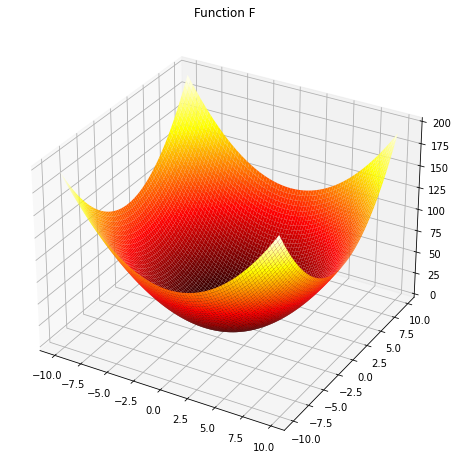

Mutation 0
Iteration 0199 : best score = -0.00000002, mean score = -0.00000044.
Iteration 0399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0999 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1199 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1999 : best score = -0.00000000, mean score = -0.00000000.
BEST VALUE: -0.00000000


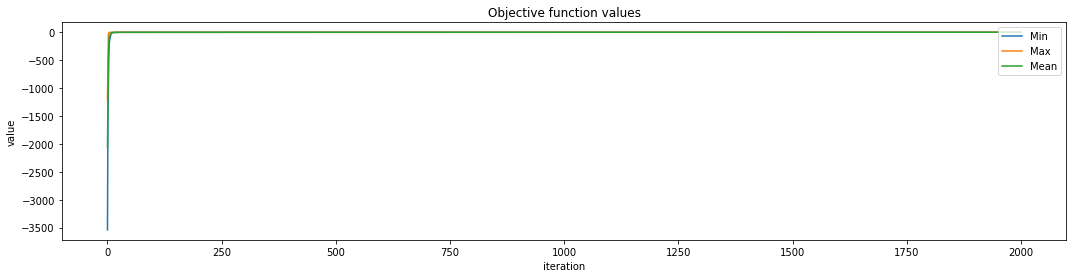

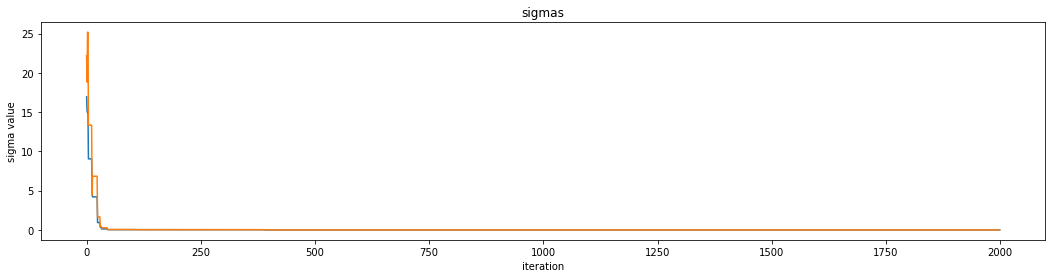

Mutation 1
Iteration 0199 : best score = -3365.68278891, mean score = -3403.49083153.
Iteration 0399 : best score = -2546.75946321, mean score = -2571.88937384.
Iteration 0599 : best score = -1809.42816407, mean score = -1868.53878871.
Iteration 0799 : best score = -1120.99699076, mean score = -1150.45481107.
Iteration 0999 : best score = -697.67938593, mean score = -716.67011429.
Iteration 1199 : best score = -348.23289902, mean score = -355.89413280.
Iteration 1399 : best score = -117.06680386, mean score = -124.09057776.
Iteration 1599 : best score = -5.52632541, mean score = -7.75587959.
Iteration 1799 : best score = -0.00132862, mean score = -0.00523255.
Iteration 1999 : best score = -0.00030316, mean score = -0.00219895.
BEST VALUE: -0.00030316


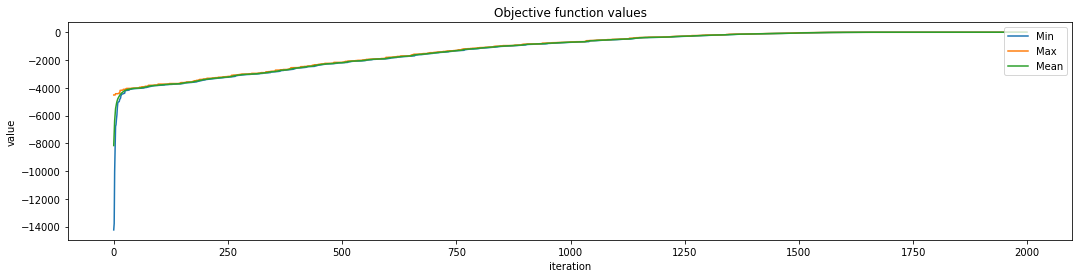

Mutation 2
Iteration 0199 : best score = -0.11794661, mean score = -9.47098128.
Iteration 0399 : best score = -0.11794661, mean score = -2.64292587.
Iteration 0599 : best score = -0.11794661, mean score = -2.44950139.
Iteration 0799 : best score = -0.11794661, mean score = -1.59216433.
Iteration 0999 : best score = -0.11794661, mean score = -1.29346097.
Iteration 1199 : best score = -0.11794661, mean score = -1.03774371.
Iteration 1399 : best score = -0.11794661, mean score = -0.86105932.
Iteration 1599 : best score = -0.11794661, mean score = -0.65904544.
Iteration 1799 : best score = -0.11794661, mean score = -0.60278062.
Iteration 1999 : best score = -0.11794661, mean score = -0.56218269.
BEST VALUE: -0.11794661


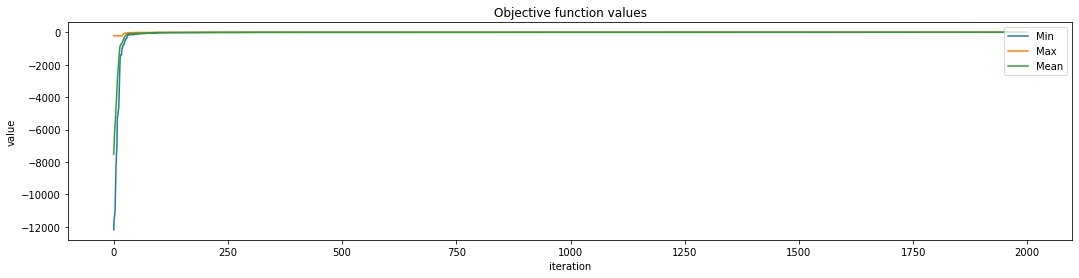

Mutation 3
Iteration 0199 : best score = -185.09003061, mean score = -196.93776095.
Iteration 0399 : best score = -0.73232486, mean score = -1.13576848.
Iteration 0599 : best score = -0.00024465, mean score = -0.01234900.
Iteration 0799 : best score = -0.00024465, mean score = -0.00766148.
Iteration 0999 : best score = -0.00024465, mean score = -0.00676320.
Iteration 1199 : best score = -0.00024465, mean score = -0.00505649.
Iteration 1399 : best score = -0.00024465, mean score = -0.00428512.
Iteration 1599 : best score = -0.00024465, mean score = -0.00382303.
Iteration 1799 : best score = -0.00024465, mean score = -0.00319496.
Iteration 1999 : best score = -0.00024465, mean score = -0.00293573.
BEST VALUE: -0.00024465


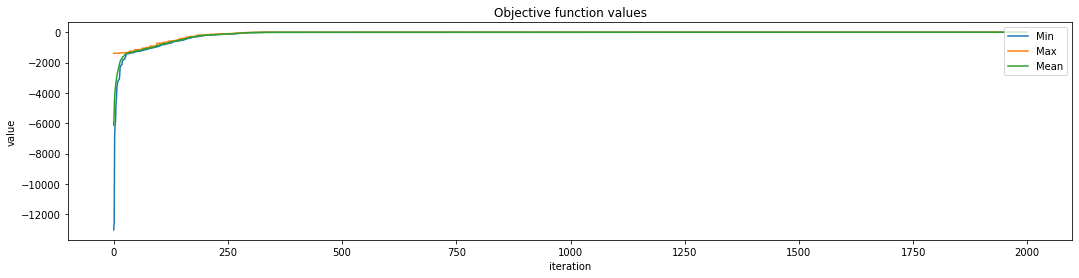

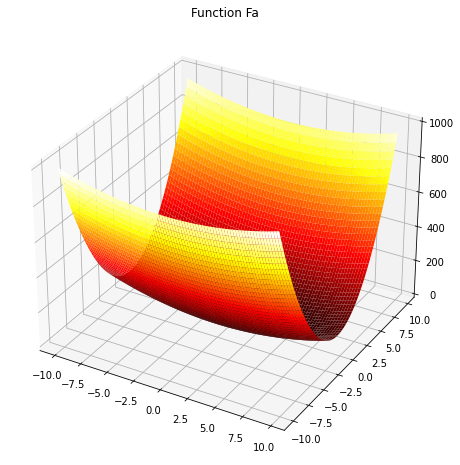

Mutation 0
Iteration 0199 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0999 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1199 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1999 : best score = -0.00000000, mean score = -0.00000000.
BEST VALUE: -0.00000000


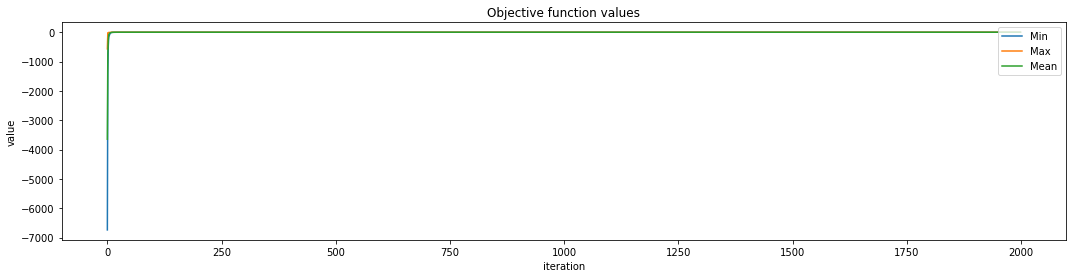

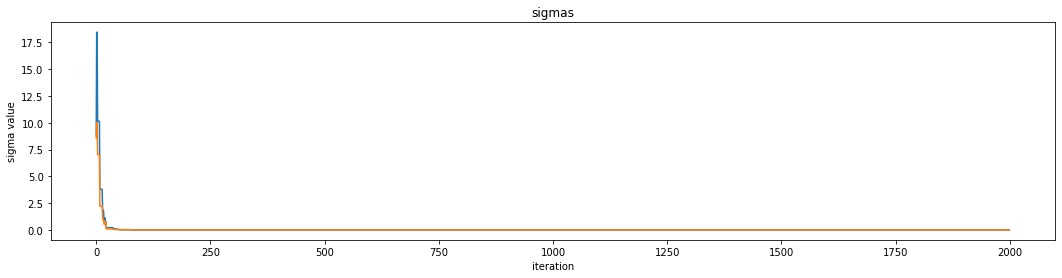

Mutation 1
Iteration 0199 : best score = -8775.36339465, mean score = -8838.93393663.
Iteration 0399 : best score = -6942.94236511, mean score = -7041.89529786.
Iteration 0599 : best score = -5539.61614832, mean score = -5603.85097561.
Iteration 0799 : best score = -4338.50321989, mean score = -4350.76384154.
Iteration 0999 : best score = -3284.81025218, mean score = -3302.66934390.
Iteration 1199 : best score = -2499.02767503, mean score = -2527.56255718.
Iteration 1399 : best score = -1731.82858275, mean score = -1781.99974623.
Iteration 1599 : best score = -1083.98689085, mean score = -1109.96588773.
Iteration 1799 : best score = -623.92998467, mean score = -647.42320067.
Iteration 1999 : best score = -317.25671207, mean score = -322.51459709.
BEST VALUE: -317.25671207


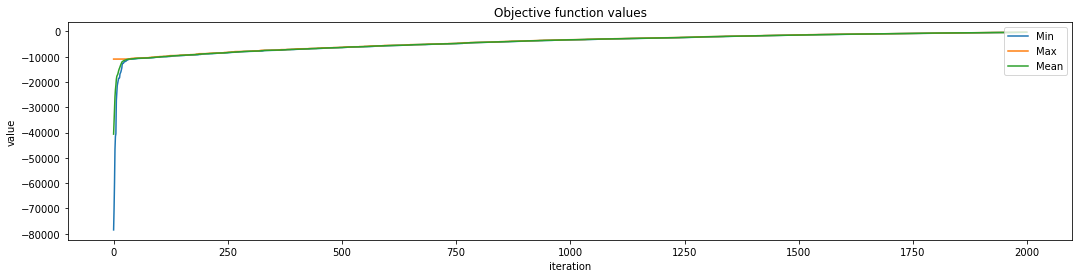

Mutation 2
Iteration 0199 : best score = -2.45574916, mean score = -35.69799340.
Iteration 0399 : best score = -2.45574916, mean score = -11.27199558.
Iteration 0599 : best score = -2.45574916, mean score = -6.70547369.
Iteration 0799 : best score = -2.45574916, mean score = -5.50304763.
Iteration 0999 : best score = -2.45574916, mean score = -4.79708672.
Iteration 1199 : best score = -2.41140218, mean score = -4.09899285.
Iteration 1399 : best score = -1.62013146, mean score = -3.46341996.
Iteration 1599 : best score = -1.62013146, mean score = -3.43977373.
Iteration 1799 : best score = -1.62013146, mean score = -3.43977373.
Iteration 1999 : best score = -1.62013146, mean score = -3.43977373.
BEST VALUE: -1.62013146


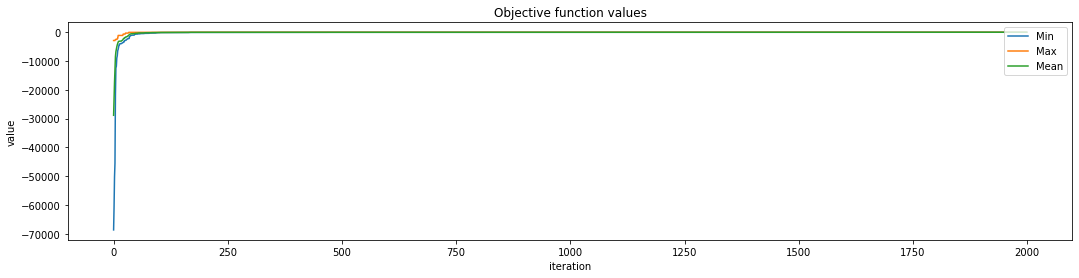

Mutation 3
Iteration 0199 : best score = -4.68956398, mean score = -7.05527810.
Iteration 0399 : best score = -0.01801207, mean score = -0.07855405.
Iteration 0599 : best score = -0.01072933, mean score = -0.02775062.
Iteration 0799 : best score = -0.00088461, mean score = -0.01283842.
Iteration 0999 : best score = -0.00088461, mean score = -0.01009540.
Iteration 1199 : best score = -0.00088461, mean score = -0.00990851.
Iteration 1399 : best score = -0.00088461, mean score = -0.00544608.
Iteration 1599 : best score = -0.00088461, mean score = -0.00455064.
Iteration 1799 : best score = -0.00088461, mean score = -0.00285199.
Iteration 1999 : best score = -0.00069765, mean score = -0.00239654.
BEST VALUE: -0.00069765


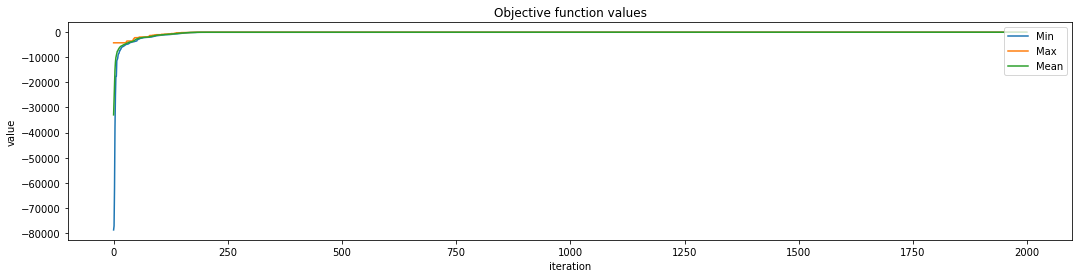

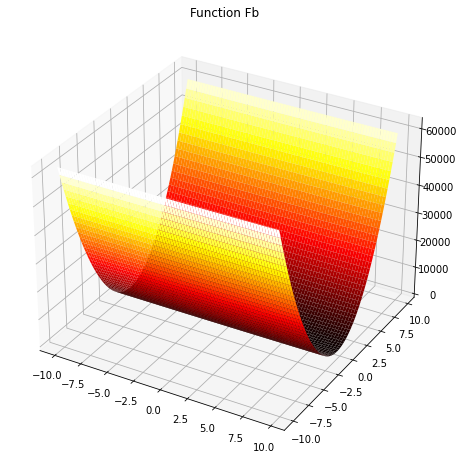

Mutation 0
Iteration 0199 : best score = -0.00000004, mean score = -0.00000010.
Iteration 0399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0999 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1199 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1999 : best score = -0.00000000, mean score = -0.00000000.
BEST VALUE: -0.00000000


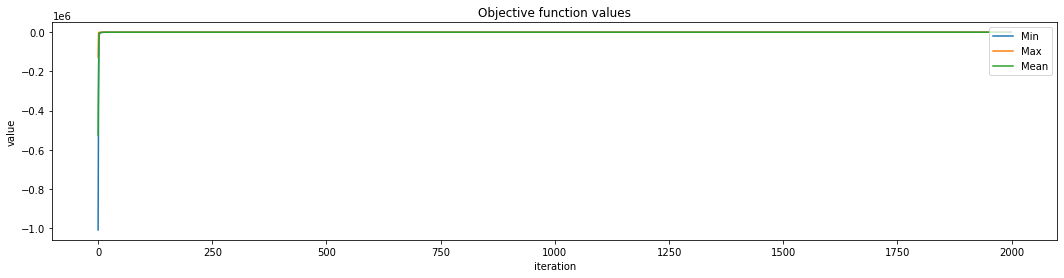

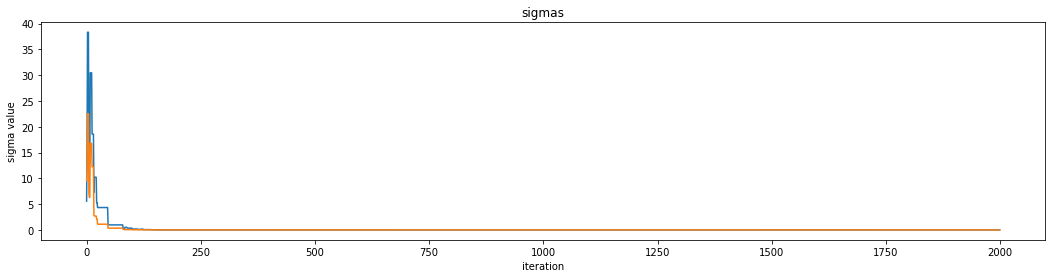

Mutation 1
Iteration 0199 : best score = -142.57418027, mean score = -181.28640817.
Iteration 0399 : best score = -87.14351003, mean score = -92.28549253.
Iteration 0599 : best score = -35.17652924, mean score = -41.79887733.
Iteration 0799 : best score = -13.40069080, mean score = -19.43352396.
Iteration 0999 : best score = -6.42099394, mean score = -8.53397675.
Iteration 1199 : best score = -0.58212024, mean score = -0.98733545.
Iteration 1399 : best score = -0.02958750, mean score = -0.25207541.
Iteration 1599 : best score = -0.00276397, mean score = -0.06986245.
Iteration 1799 : best score = -0.00276397, mean score = -0.05845635.
Iteration 1999 : best score = -0.00276397, mean score = -0.04006154.
BEST VALUE: -0.00276397


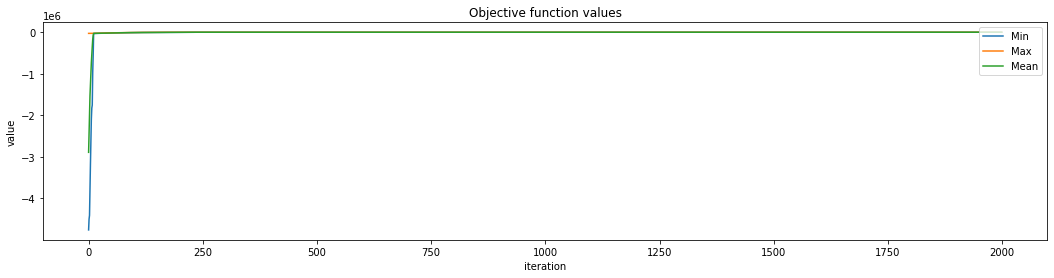

Mutation 2
Iteration 0199 : best score = -14.20276741, mean score = -558.30325743.
Iteration 0399 : best score = -0.76062892, mean score = -198.50480666.
Iteration 0599 : best score = -0.76062892, mean score = -94.67029283.
Iteration 0799 : best score = -0.76062892, mean score = -34.45626864.
Iteration 0999 : best score = -0.76062892, mean score = -29.09583261.
Iteration 1199 : best score = -0.76062892, mean score = -23.15942304.
Iteration 1399 : best score = -0.76062892, mean score = -19.69311029.
Iteration 1599 : best score = -0.76062892, mean score = -15.48801979.
Iteration 1799 : best score = -0.76062892, mean score = -11.65567558.
Iteration 1999 : best score = -0.76062892, mean score = -11.65567558.
BEST VALUE: -0.76062892


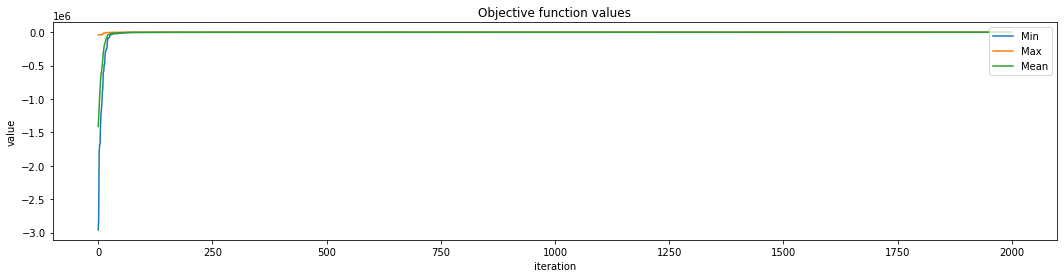

Mutation 3
Iteration 0199 : best score = -520.35083979, mean score = -568.66614060.
Iteration 0399 : best score = -326.88231599, mean score = -357.08163519.
Iteration 0599 : best score = -286.13242602, mean score = -303.43439187.
Iteration 0799 : best score = -226.42307718, mean score = -236.26714539.
Iteration 0999 : best score = -148.01561820, mean score = -158.02785242.
Iteration 1199 : best score = -91.25027472, mean score = -97.37950389.
Iteration 1399 : best score = -56.10666599, mean score = -62.80575456.
Iteration 1599 : best score = -45.42195268, mean score = -51.37114815.
Iteration 1799 : best score = -33.05122767, mean score = -38.94708626.
Iteration 1999 : best score = -25.34277269, mean score = -26.71314415.
BEST VALUE: -25.34277269


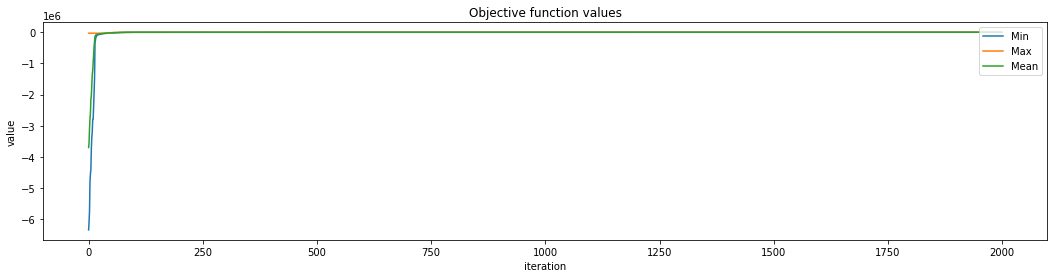

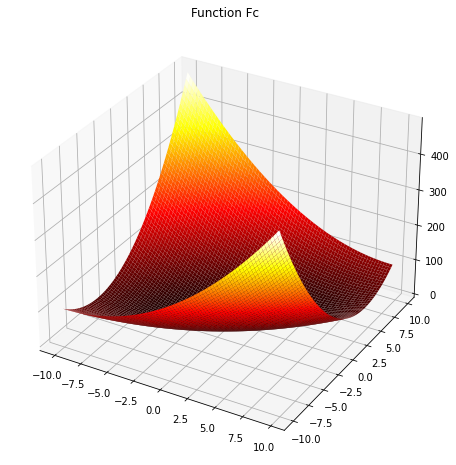

Mutation 0
Iteration 0199 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0999 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1199 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1399 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1599 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1799 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1999 : best score = -0.00000000, mean score = -0.00000000.
BEST VALUE: -0.00000000


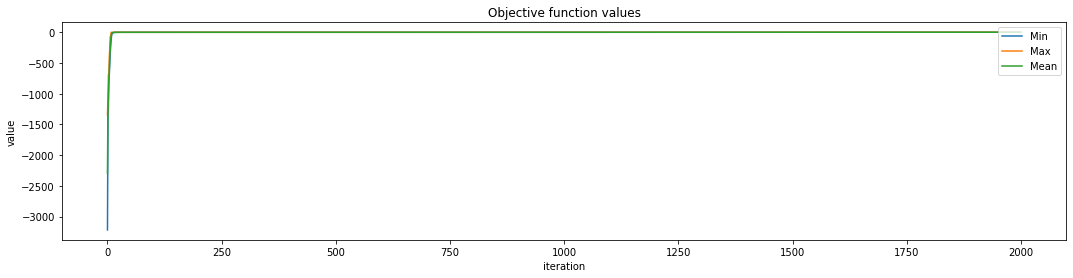

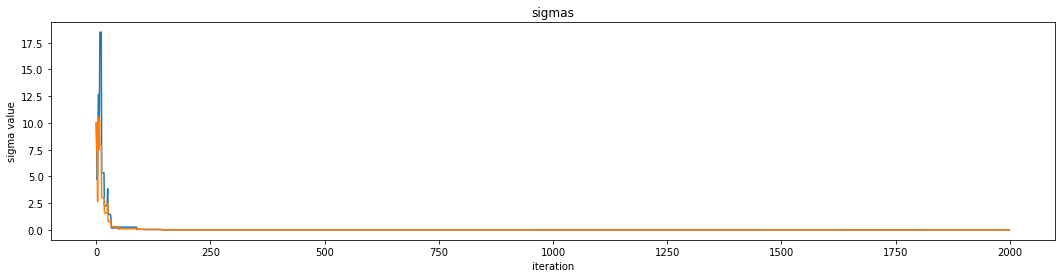

Mutation 1
Iteration 0199 : best score = -748.48930545, mean score = -775.95698392.
Iteration 0399 : best score = -502.55314496, mean score = -520.19416198.
Iteration 0599 : best score = -289.43119386, mean score = -293.41830171.
Iteration 0799 : best score = -141.51865596, mean score = -146.39890112.
Iteration 0999 : best score = -47.94697986, mean score = -50.01625110.
Iteration 1199 : best score = -5.09354201, mean score = -5.54718802.
Iteration 1399 : best score = -0.00071760, mean score = -0.00841634.
Iteration 1599 : best score = -0.00061108, mean score = -0.00240984.
Iteration 1799 : best score = -0.00061108, mean score = -0.00135125.
Iteration 1999 : best score = -0.00016123, mean score = -0.00109495.
BEST VALUE: -0.00016123


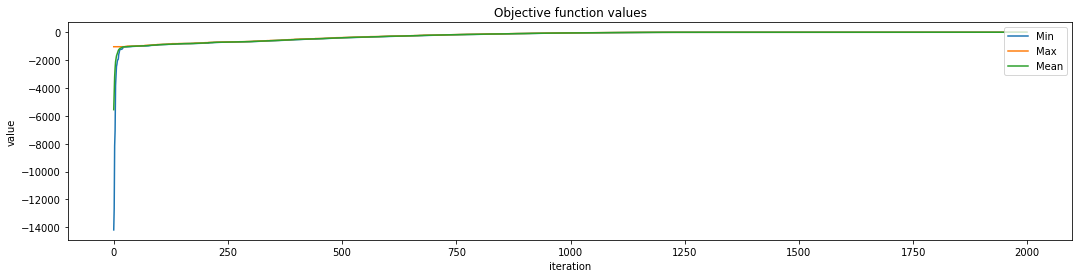

Mutation 2
Iteration 0199 : best score = -1.02829819, mean score = -11.66458524.
Iteration 0399 : best score = -1.02829819, mean score = -4.45414639.
Iteration 0599 : best score = -0.87068959, mean score = -2.44090929.
Iteration 0799 : best score = -0.87068959, mean score = -1.75787541.
Iteration 0999 : best score = -0.87068959, mean score = -1.34557614.
Iteration 1199 : best score = -0.67575723, mean score = -1.23653517.
Iteration 1399 : best score = -0.67575723, mean score = -1.17932666.
Iteration 1599 : best score = -0.67575723, mean score = -1.17932666.
Iteration 1799 : best score = -0.25093877, mean score = -0.84064359.
Iteration 1999 : best score = -0.25093877, mean score = -0.84064359.
BEST VALUE: -0.25093877


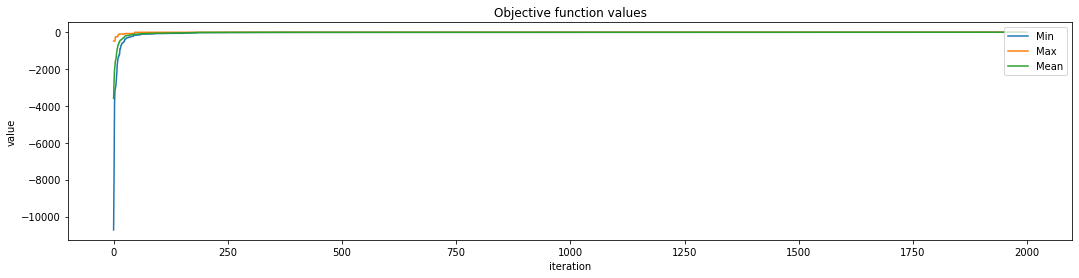

Mutation 3
Iteration 0199 : best score = -1.46734415, mean score = -2.52587279.
Iteration 0399 : best score = -0.00143144, mean score = -0.01495488.
Iteration 0599 : best score = -0.00143144, mean score = -0.00656792.
Iteration 0799 : best score = -0.00121598, mean score = -0.00574417.
Iteration 0999 : best score = -0.00045915, mean score = -0.00302236.
Iteration 1199 : best score = -0.00045915, mean score = -0.00298068.
Iteration 1399 : best score = -0.00012699, mean score = -0.00224039.
Iteration 1599 : best score = -0.00012699, mean score = -0.00187470.
Iteration 1799 : best score = -0.00012699, mean score = -0.00132990.
Iteration 1999 : best score = -0.00012699, mean score = -0.00129190.
BEST VALUE: -0.00012699


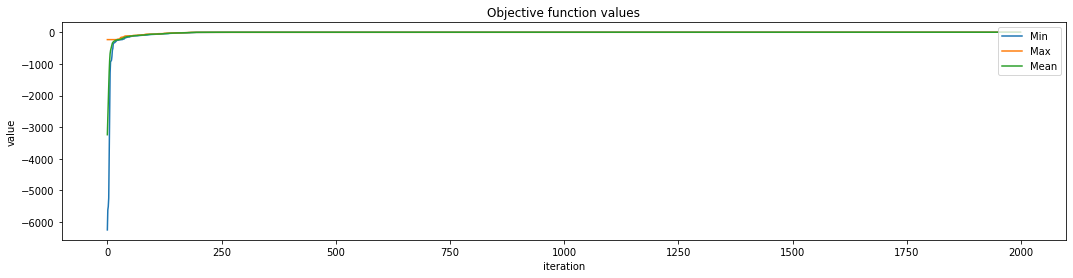

In [37]:
functions= [objective_function_F1, objective_function_F1a, objective_function_F1b,objective_function_F1c]
d = 2
N = 10
T = 2000
def run_es(d, N, T, objective_function, mutation, log_every=200):
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function, d, N, T, 2*N, 2,
        10, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), log_every,
        mutation=mutation
    )
    print('BEST VALUE: %0.8f' % (history_objective_values[:, 1].max()))
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0])
    plt.plot(history_objective_values[:, 1])
    plt.plot(history_objective_values[:, 2])
    plt.xlabel('iteration')
    plt.ylabel('value')
    plt.title('Objective function values')
    plt.legend(['Min', 'Max', 'Mean'], loc='upper right')
    plt.show()

    if(mutation == 0):
        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas)
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('sigmas')
        plt.show()

for i, function in enumerate(functions):
    names =['', 'a','b','c']
    plot_3D_benchmark_function(
        objective_function=function,
        domain_X=np.arange(-10, 10, 0.25),
        domain_Y=np.arange(-10, 10, 0.25),
        title=f'Function F{names[i]}'
    )
    for i in range(4):
        print(f"Mutation {i}") # mutation 0 is the one from notebook
        run_es(d=d, N=N, T=T, objective_function=function, mutation=i)

